# Using IPW to evaluate an innovative secondary education program
# Jiwon Son


In [32]:
# Load core data science libraries
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Read in tab delimited dataset into a pandas dataframe
col_dtypes = {"c10_zmath" : float , "wgt10_math" : float , "sat " : int , "constant " : int , "c08_zlang " : float , "c08_zmath" : float , "feeder_school" : int, "m_id_pairs" : int}
df = pd.read_csv("/Users/math_10.out.txt", dtype = col_dtypes, na_values="", engine="c", sep = "\t", encoding = "utf−8")
# Construct a list of all matched SAT−CEB village pairs in the dataset
included_pairs = sorted (df["m_id_pairs"].unique ())
# Form dummies for included matched SAT/CEB pairs
pair_dums = pd.get_dummies(df["m_id_pairs"].astype("category"), prefix="mp")
# Concatenate matched pair dummies onto dataframe 
df = pd. concat ([ df , pair_dums ] , axis=1)
# Construct outcome vector, design matrix, and test instrument inverse weights
Y= df["c08_zmath"] #Outcome
test_wgt = 1./df["wgt10_math"] # Test instrument weights 
X= df[["constant","sat"]] # Design matrix

X= pd.concat([X, df.loc[:,"mp_" + str(included_pairs[0]) : "mp_"+ str(included_pairs[-2])]], axis=1)
#NOTE: omit last matched pair to avoid "dummy variable trap"
# Compute weighted least squares fit
# NOTE: cluster−robust standard errors
wls = sm.WLS(Y,X,weights=test_wgt).fit(cov_type="cluster",cov_kwds={"groups": df["feeder_school"]},use_t=True)
wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              c08_zmath   R-squared:                       0.238
Model:                            WLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     218.0
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           1.39e-66
Time:                        16:57:59   Log-Likelihood:                -965.57
No. Observations:                 713   AIC:                             2013.
Df Residuals:                     672   BIC:                             2200.
Df Model:                          40                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.2664      0.382     -0.697      0.488      -1.027       0.494
sat            0.0416      0.116      0.358      0.721      -0.190       0.273
mp_2           0.1473      0.456      0.323      0.747      -0.760       1.054
mp_3           1.2714      0.384      3.307      0.001       0.506       2.036
mp_6           0.3375      0.439      0.769      0.444      -0.536       1.211
mp_7           0.0137      0.384      0.036      0.972      -0.750       0.778
mp_9           0.4265      0.394      1.082      0.283      -0.358       1.211
mp_10          0.7381      0.410      1.801      0.076      -0.078       1.554
mp_12          0.6417      0.783      0.820      0.415      -0.917       2.200
mp_13          0.8942      0.381      2.345      0.022       0.135       1.653
mp_15          0.9155      0.432      2.120      0.037       0.056       1.775
mp_16         -0.3223      0.478     -0.674      0.502      -1.275       0.630
mp_17          0.1861      0.377      0.493      0.623      -0.565       0.937
mp_18         -1.0858      0.378     -2.872      0.005      -1.838      -0.333
mp_19         -0.2624      0.377     -0.695      0.489      -1.013       0.489
mp_20          0.5475      0.635      0.862      0.391      -0.717       1.812
mp_21         -0.2590      0.532     -0.487      0.627      -1.317       0.799
mp_22          0.5116      0.396      1.293      0.200      -0.276       1.299
mp_23         -0.3545      0.386     -0.920      0.361      -1.122       0.413
mp_24          0.7272      0.382      1.904      0.061      -0.033       1.487
mp_27         -0.0439      0.624     -0.070      0.944      -1.286       1.198
mp_30          0.5760      0.398      1.446      0.152      -0.217       1.369
mp_31          0.2214      0.398      0.557      0.579      -0.570       1.013
mp_33          0.4236      0.376      1.126      0.264      -0.325       1.173
mp_35         -0.0452      0.376     -0.120      0.904      -0.793       0.702
mp_36         -0.1423      0.376     -0.378      0.706      -0.891       0.607
mp_37         -0.2757      0.573     -0.481      0.632      -1.417       0.865
mp_38          0.5423      0.686      0.791      0.432      -0.823       1.908
mp_39          1.2330      0.521      2.365      0.020       0.195       2.271
mp_40          0.4963      0.515      0.964      0.338      -0.528       1.521
mp_42         -0.0825      0.372     -0.221      0.825      -0.823       0.659
mp_43          0.6536      0.369      1.770      0.081      -0.082       1.389
mp_45          0.6193      0.925      0.670      0.505      -1.221       2.460
mp_47          0.9833      0.377      2.606      0.011       0.232       1.734
mp_48          0.4174      0.378      1.104      0.273      -0.335       1.170
mp_50          0.0831      0.378      0.220      0.826      -0.669       0.835
mp

Q2. Interpret the coefficient on sat in light of the research design described by McEwan et al. (2015). What is accomplished by weighting by the inverse of wgt10_math weights?

Answer: The coefficient on sat is 0.0416 with standard error 0.116. This means that students who live in
  SAT village in 2008 are on average likely to receive a math grade 0.04 standard deviations higher than the baseline,   compared to those who live in CEB village.
  Through weighting by the inverse of the wgt10_math weights, we can upweight the subpopulation
  who took in-home test (either math or language test) in comparison to the subpopulation who took the original test     at school (both math and language tests) and compare these two subpoplations on the same scale. We can do this         because the students who took in-home test and the group of students who took the test in school are equally           important for analysis and we want to make sure that the regression result is not biased towards the group of         students who took the original test in school.

In [33]:
#3
# Construct outcome vector
Y1= df["c10_zmath"] #Outcome
# Compute weighted least squares fit, use design matrix and test instrument inverse weights from #2
# NOTE: cluster−robust standard errors
wls2 = sm.WLS(Y1,X,weights=test_wgt).fit(cov_type="cluster",cov_kwds={"groups": df["feeder_school"]},use_t=True)
wls2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              c10_zmath   R-squared:                       0.146
Model:                            WLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     48.02
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           2.02e-41
Time:                        16:57:59   Log-Likelihood:                -1067.3
No. Observations:                 713   AIC:                             2217.
Df Residuals:                     672   BIC:                             2404.
Df Model:                          40                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.1922      0.206     -0.934      0.353      -0.602       0.218
sat            0.1547      0.099      1.560      0.123      -0.043       0.352
mp_2           0.0426      0.224      0.191      0.849      -0.402       0.488
mp_3           0.9798      0.226      4.334      0.000       0.530       1.430
mp_6           0.8838      0.211      4.197      0.000       0.465       1.303
mp_7           0.4992      0.314      1.589      0.116      -0.126       1.125
mp_9           1.0689      0.243      4.398      0.000       0.585       1.553
mp_10          0.2537      0.334      0.759      0.450      -0.411       0.919
mp_12          0.5964      0.297      2.009      0.048       0.006       1.187
mp_13          0.9082      0.195      4.661      0.000       0.520       1.296
mp_15          0.7975      0.219      3.637      0.000       0.361       1.234
mp_16          0.3924      0.205      1.915      0.059      -0.015       0.800
mp_17          0.4594      0.203      2.267      0.026       0.056       0.863
mp_18         -0.6551      0.239     -2.743      0.008      -1.130      -0.180
mp_19          0.6984      0.278      2.512      0.014       0.145       1.252
mp_20          0.9563      0.287      3.333      0.001       0.385       1.527
mp_21          0.1826      0.672      0.272      0.787      -1.155       1.520
mp_22          0.0197      0.246      0.080      0.936      -0.469       0.509
mp_23          0.2060      0.317      0.650      0.517      -0.425       0.837
mp_24          0.6934      0.207      3.344      0.001       0.281       1.106
mp_27          0.3406      0.238      1.428      0.157      -0.134       0.815
mp_30          0.7343      0.646      1.136      0.259      -0.552       2.020
mp_31          1.1224      0.250      4.481      0.000       0.624       1.621
mp_33          0.8081      0.346      2.335      0.022       0.119       1.497
mp_35         -0.1022      0.231     -0.442      0.660      -0.563       0.358
mp_36          0.4726      0.199      2.373      0.020       0.076       0.869
mp_37          0.1260      0.438      0.288      0.774      -0.746       0.998
mp_38          1.0243      0.446      2.298      0.024       0.137       1.911
mp_39          0.7930      0.202      3.928      0.000       0.391       1.195
mp_40          0.7258      0.270      2.691      0.009       0.189       1.263
mp_42         -0.2063      0.198     -1.042      0.300      -0.600       0.188
mp_43          0.8671      0.228      3.804      0.000       0.413       1.321
mp_45          0.9330      0.873      1.069      0.288      -0.804       2.670
mp_47          0.3070      0.422      0.727      0.469      -0.534       1.148
mp_48         -0.0097      0.335     -0.029      0.977      -0.677       0.658
mp_50          0.6283      0.331      1.896      0.062      -0.031       1.288
mp

Q3. Interpret the coefficient on sat in light of the resaerch design described by McEwan et al. (2015)

Answer: The coefficient on sat is 0.1547. This means that students who live in SAT village in 2010 are on average likely to receive a math test grade 0.15 standard deviations higher than the baseline, compared to those who live in CEB village.

In [34]:
#4
# Add "c08_zmath" and "c08_zlang" as control variables in the WLS fit and compute the new WLS fit
X1= df[["constant","sat","c08_zmath","c08_zlang"]]
X1= pd.concat([X1, df.loc[:,"mp_" + str(included_pairs[0]) : "mp_"+ str(included_pairs[-2])]], axis=1)
wls3 = sm.WLS(Y1,X1,weights=test_wgt).fit(cov_type="cluster",cov_kwds={"groups": df["feeder_school"]},use_t=True)
wls3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              c10_zmath   R-squared:                       0.462
Model:                            WLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     69.49
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           8.57e-48
Time:                        16:57:59   Log-Likelihood:                -902.26
No. Observations:                 713   AIC:                             1891.
Df Residuals:                     670   BIC:                             2087.
Df Model:                          42                                         
Covariance Type:              cluster                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0319      0.055      0.579      0.564      -0.078       0.142
sat            0.1342      0.082      1.636      0.106      -0.029       0.297
c08_zmath      0.5124      0.056      9.173      0.000       0.401       0.624
c08_zlang      0.2577      0.049      5.264      0.000       0.160       0.355
mp_2          -0.1218      0.246     -0.495      0.622      -0.612       0.368
mp_3          -0.0918      0.087     -1.059      0.293      -0.264       0.081
mp_6           0.6063      0.276      2.198      0.031       0.057       1.155
mp_7           0.4544      0.165      2.758      0.007       0.126       0.782
mp_9           0.7510      0.048     15.508      0.000       0.655       0.847
mp_10         -0.3037      0.112     -2.703      0.008      -0.527      -0.080
mp_12          0.2819      0.239      1.180      0.242      -0.194       0.757
mp_13          0.2218      0.097      2.296      0.024       0.030       0.414
mp_15          0.2058      0.049      4.194      0.000       0.108       0.303
mp_16          0.5164      0.263      1.965      0.053      -0.007       1.039
mp_17          0.3471      0.071      4.858      0.000       0.205       0.489
mp_18          0.1698      0.133      1.272      0.207      -0.096       0.435
mp_19          0.7460      0.209      3.566      0.001       0.330       1.162
mp_20          0.4745      0.167      2.849      0.006       0.143       0.806
mp_21          0.2258      0.404      0.560      0.577      -0.577       1.029
mp_22         -0.4286      0.162     -2.645      0.010      -0.751      -0.106
mp_23          0.3738      0.161      2.321      0.023       0.053       0.694
mp_24          0.2733      0.140      1.953      0.054      -0.005       0.552
mp_27          0.4040      0.154      2.629      0.010       0.098       0.710
mp_30          0.2758      0.473      0.583      0.562      -0.666       1.217
mp_31          0.9408      0.102      9.259      0.000       0.739       1.143
mp_33          0.4265      0.252      1.693      0.094      -0.075       0.928
mp_35          0.0006      0.083      0.007      0.995      -0.165       0.166
mp_36          0.5594      0.040     13.922      0.000       0.479       0.639
mp_37          0.1787      0.121      1.480      0.143      -0.062       0.419
mp_38          0.5310      0.051     10.413      0.000       0.429       0.632
mp_39         -0.1882      0.183     -1.028      0.307      -0.553       0.176
mp_40          0.3051      0.062      4.940      0.000       0.182       0.428
mp_42         -0.1855      0.100     -1.853      0.068      -0.385       0.014
mp_43          0.4251      0.141      3.005      0.004       0.144       0.707
mp_45          0.4729      0.251      1.884      0.063      -0.027       0.972
mp_47         -0.3124      0.253     -1.233      0.221      -0.817       0.192
mp

Q4. Interpret the coefficient on sat.

Ans: Controlling for c08_zmath and c08_zlang, we can expect to consider those students who
     are inherently good separately from the effect of SAT on the student score, and separate that out
     to better measure the effect of SAT on the score.
     If the student lives in sat village in 2010, given that their math and langauge test scores in 2008 are                controlled, then we can expect the average treatment effect of SAT to be 0.1342, as shown in the regression            table.
     To state this differently, students who live in sat village in 2010 are on average likely to 
     receive a math test grade 0.1342 standard deviations higher than the baseline, compared to those who live in CEB      village.

Optimization terminated successfully.
         Current function value: 0.627957
         Iterations 6


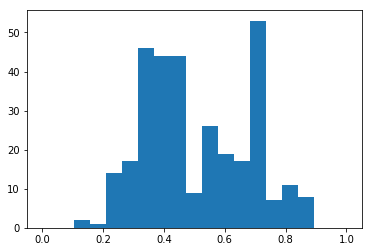

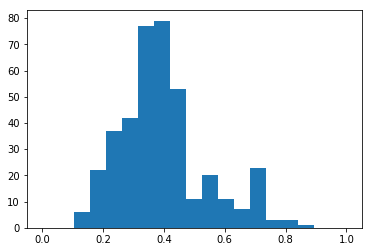

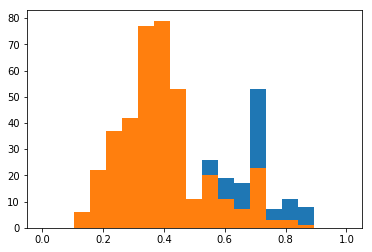

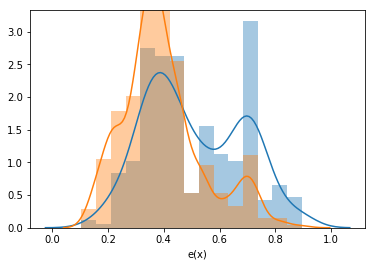

In [41]:
#5
#Compute the logistic regression fit of sat onto a constant, the matched SAT-CEB pair dummies, and the two baseline test scores
Y2= df["sat"]
X3= df[["constant", "c08_zmath", "c08_zlang"]]
X3= pd.concat([X3, df.loc[:,"mp_" + str(included_pairs[0]) : "mp_"+ str(included_pairs[-2])]], axis=1)
lr=sm.Logit(Y2,X3).fit()
lr.summary()

#Compute the fitted propensity score values
fitted=lr.fittedvalues.values
Exp= np.exp(fitted)

Propensity_Score= Exp/(1+Exp)

#Plot the propensity scores for treated and controlled groups as a graphical evidence for overlap condition satisfied
bins=np.linspace(0,1,20)

TableSatProp = pd.DataFrame ({'sat':Y2,'e(x)':Propensity_Score})

PropenT = TableSatProp[TableSatProp['sat']==1]
['e(x)']
PropenC = TableSatProp[TableSatProp['sat']==0]
['e(x)']

plt.hist(PropenT['e(x)'], bins)
plt.show()
plt.hist(PropenC['e(x)'], bins)
plt.show()
plt.hist(PropenT['e(x)'], bins)
plt.hist(PropenC['e(x)'], bins)
plt.show()

sns.distplot(PropenT['e(x)'],bins) 
sns.distplot(PropenC['e(x)'],bins)
plt.show()

Q5. Compute the propensity score values. Is the overlap condition satisfied? Why?

Ans: The overlap condition is satisfied because the propensity scores for both treatment and control groups range      between 0 and 1. Based on the assumption that we need some treatment and control units for each value of the propensity score, we want to see if the propensity scores for the two groups overlap. If we plot the propensity score for each group, the two groups show a considerable amount of overlap. Therefore, we can compare the two groups.

In [ ]:
#6
#Compute the IPW weights for average treatment effect estimation
V = (Y2/Propensity_Score)+((1-Y2)/(1-Propensity_Score))
X4= df[["constant", "sat"]]

#Compute the weighted least squares fit of math test score in 2010 onto a constant and sat 
#using the IPW weights multiplied by test instrument weights
#NOTE: cluster−robust standard errors
wls4 = sm.WLS(Y1,X4,weights=test_wgt*V).fit(cov_type="cluster", cov_kwds={"groups": df["feeder_school"]},use_t=True)
wls4.summary()

Q6. What is accomplished by using these weights. Interpret the coefficient on sat.

Ans:  Weighting by the IPW weights*test_wgt, we can expect to upweight the underrepresneted group (those with low           propensity score), and thus adjust the average treatment effect of the independent variable by leveling the           probability that subgroups in SAT and CEB pairs are represented in the experiment.
      This is because some subgroups of students who have certain covariate characteristics are more likely to be           treated than other subgroups in each pair.
      The sat coefficient is 0.1602 with cluster-robust standard error 0.143. This means that
      students who live in SAT village in 2010 are on average likely to receive a math test grade 0.16 standard             deviations higher than the baseline, compared to those who live in CEB village.

Q7. What asdditoinal data would you have collected to answer the questions studied by McEwan et al. (2015) if provided the opportunity?

Ans: If given the opportunity, I would have collected percentage of homes with internet connection in addition to percentage of homes with computer already collected. Also, I would have collected grandparents' level of education.   p value is too big to give a statistically significant result in almost every regression done so far, so we might want to include more control variables adjust for the possible omitted variable bias.